# Analysis Project: Picogreen Concentration vs. User

In [1]:
#Import necessary functions
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

#Makes a white backround with gray horizontal gridmarks at y-values
sns.set_style("whitegrid")

In [2]:
#ps = patch_seq csv file
ps = pd.read_csv("patch_seq_log_mouse.csv")

In [3]:
#list_initial = list with specific columns used from csv file
list_initial = ["Date", "User", "Rig #", "Picogreen conc. (pg/uL)", "PCR cycles", "SM_QC_PF", "Bad dates"]
ps = ps[list_initial]
ps.head()

Date User Rig # Picogreen conc. (pg/uL)  PCR cycles SM_QC_PF Bad dates
0  170104   P1     5                     NaN        18.0     pass         x
1  170104   P1     5                     NaN        18.0     pass         x
2  170104   P1     5                     NaN        18.0     pass         x
3  170104   P1     5                     NaN        18.0     pass         x
4  170104   P1     5                     NaN        18.0     pass         x

### Categorizing & Filtering the columns

In [4]:
#Changing Date Format
ps["Date"] = pd.to_datetime(ps["Date"], format = "%y%m%d", errors = "coerce")

#Changing String to Numerical
ps["Picogreen conc. (pg/uL)"] = pd.to_numeric(ps["Picogreen conc. (pg/uL)"].str.replace(' ',''), errors ='coerce')

#Categories
ps["User"] = ps["User"].astype("category")
ps["Rig #"] = ps["Rig #"].astype("category")
ps["PCR cycles"] = ps["PCR cycles"].astype("category")
ps["SM_QC_PF"] = ps["SM_QC_PF"].astype("category")
ps["Bad dates"] = ps["Bad dates"].astype("category")

#Filtering Columns
ps = ps[ps["PCR cycles"] == 21]      #Shows 21 pcr cycles
ps = ps[ps["SM_QC_PF"] != "cnt"]     #Shows everything except (cnt = control)
ps = ps[ps["Bad dates"] != "x"]      #Shows everthing except (x = contaminated)

#Dropping blank columns
ps = ps.drop("Bad dates", 1)
ps.dropna(subset = ["User", "Picogreen conc. (pg/uL)", "SM_QC_PF"], inplace = True)
ps.head()

Date User Rig #  Picogreen conc. (pg/uL) PCR cycles SM_QC_PF
1634 2017-04-19   P2     6                     71.0       21.0     fail
1635 2017-04-19   P2     6                    608.0       21.0     pass
1636 2017-04-19   P2     6                      6.0       21.0     fail
1637 2017-04-19   P2     6                   1536.0       21.0     pass
1638 2017-04-19   P2     6                    582.0       21.0     pass

In [5]:
ps.tail()

Date User Rig #  Picogreen conc. (pg/uL) PCR cycles SM_QC_PF
5219 2018-02-02   P2     3                 977.8655       21.0     pass
5220 2018-02-02   P1     1                1036.0640       21.0     pass
5221 2018-02-02   P1     1                1311.9000       21.0     pass
5222 2018-02-02   P1     1                 977.6172       21.0     pass
5223 2018-02-02   P1     1                1476.0500       21.0     pass

## Info

In [6]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2775 entries, 1634 to 5223
Data columns (total 6 columns):
Date                       2775 non-null datetime64[ns]
User                       2775 non-null category
Rig #                      2763 non-null category
Picogreen conc. (pg/uL)    2775 non-null float64
PCR cycles                 2775 non-null category
SM_QC_PF                   2775 non-null category
dtypes: category(4), datetime64[ns](1), float64(1)
memory usage: 76.9 KB


In [7]:
ps.User.value_counts()

P2    702
P8    692
P1    565
P9    326
PB    198
PA    169
P6    110
P5     13
P3      0
P0      0
Name: User, dtype: int64

## Swarmplot, Violinplot & Boxplot of Picogreen Concentration vs User

In [8]:
#Users = P1(Kristen), P2(Rusty), P8(Lindsay), P9(Lisa), PA(Ram), PB(Dijon)
#Restricted yield below 10000 (3 large outliers: 69000, 16000 & 11000)
#Data: 4/19/2017 - 2/02/2018 

Text(0,0.5,u'Picogreen Concentration (pg/uL)')

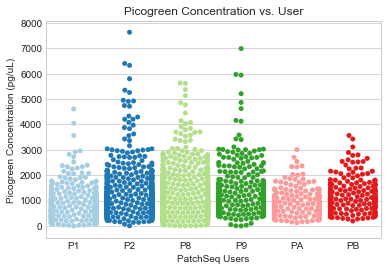

In [9]:
sp = sns.swarmplot(x = "User", 
                   y = "Picogreen conc. (pg/uL)", 
                   data = ps[ps["Picogreen conc. (pg/uL)"] < 10000], 
                   order = ["P1", "P2", "P8", "P9", "PA", "PB"], 
                   palette = "Paired").set_title("Picogreen Concentration vs. User")
plt.xlabel("PatchSeq Users")
plt.ylabel("Picogreen Concentration (pg/uL)") #Redundant ylabel

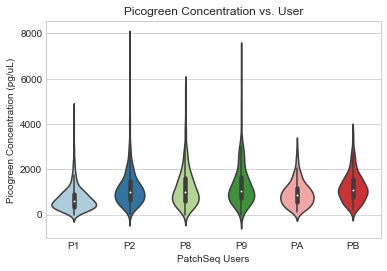

In [10]:
vp = sns.violinplot(x = "User", 
                    y = "Picogreen conc. (pg/uL)", 
                    data = ps[ps["Picogreen conc. (pg/uL)"] < 10000], 
                    order = ["P1", "P2", "P8", "P9", "PA", "PB"], 
                    palette = "Paired").set_title("Picogreen Concentration vs. User")
plt.xlabel("PatchSeq Users")
plt.ylabel("Picogreen Concentration (pg/uL)") #Redundant ylabel
plt.savefig("vio_picogreen_conc_vs_user")

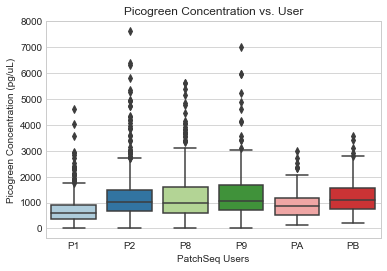

In [11]:
bp = sns.boxplot(x = "User", 
                 y = "Picogreen conc. (pg/uL)", 
                 data = ps[ps["Picogreen conc. (pg/uL)"] < 10000], 
                 order = ["P1", "P2", "P8", "P9", "PA", "PB"], 
                 palette = "Paired").set_title("Picogreen Concentration vs. User")
plt.xlabel("PatchSeq Users")
plt.ylabel("Picogreen Concentration (pg/uL)") #Redundant ylabel
plt.savefig("box_picogreen_conc_vs_user")

## Extra Box Plot with outliers included

Text(0,0.5,u'Picogreen Concentration (pg/uL)')

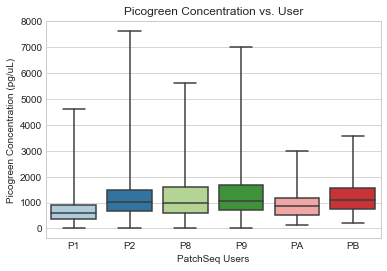

In [12]:
#whis = np.inf includes the outliers
bp = sns.boxplot(x = "User", 
                 y = "Picogreen conc. (pg/uL)", 
                 data = ps[ps["Picogreen conc. (pg/uL)"] < 10000], 
                 order = ["P1", "P2", "P8", "P9", "PA", "PB"], 
                 palette = "Paired", whis = np.inf).set_title("Picogreen Concentration vs. User")
plt.xlabel("PatchSeq Users")
plt.ylabel("Picogreen Concentration (pg/uL)") #Redundant ylabel

## Extras

In [13]:
plt.style.available

[u'seaborn-darkgrid',
 u'Solarize_Light2',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'_classic_test',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'fast',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn',
 u'seaborn-dark-palette']

In [14]:
#To create colors for individual bars, boxes, violins, use palette = [list]
#To use just one palette for whole data, use palette = "color"